In [162]:
import imblearn
import pandas as pd
import numpy as np

In [163]:
data = pd.read_csv('datos_final.csv')
data.head()

,Unnamed: 0,BP,Departamento,Hombres,Mujeres,Total Víctimas,Valor total cofinanciación ADR,Valor Contrapartida,Hectáreas,Vigencia,CADENA_PRODUCTIVA_ADR
0,0,6,CHOCO,30,5,0,250000000,513500000,100,2017,PLATANO
1,1,17,META,31,9,0,500000000,106600000,40,2017,CAFE
2,2,23,ANTIOQUIA,20,5,23,401373250,355140000,69,2017,PLATANO
3,3,23,ANTIOQUIA,20,5,23,401373250,355140000,69,2017,PLATANO
4,4,25,META,16,12,10,255000000,41570000,93,2017,CAUCHO


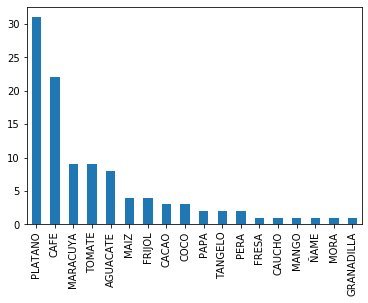

In [164]:
data['CADENA_PRODUCTIVA_ADR'].value_counts().plot.bar()

In [165]:
print('Proportion of the classes in the data:')
print(data['CADENA_PRODUCTIVA_ADR'].value_counts() / len(data))

Proportion of the classes in the data:
PLATANO       0.295238
CAFE          0.209524
MARACUYA      0.085714
TOMATE        0.085714
AGUACATE      0.076190
MAIZ          0.038095
FRIJOL        0.038095
CACAO         0.028571
COCO          0.028571
PAPA          0.019048
TANGELO       0.019048
PERA          0.019048
FRESA         0.009524
CAUCHO        0.009524
MANGO         0.009524
ÑAME          0.009524
MORA          0.009524
GRANADILLA    0.009524
Name: CADENA_PRODUCTIVA_ADR, dtype: float64


In [166]:
data = data.drop(['Unnamed: 0','BP'], axis = 1)
X = np.array(data.loc[:, data.columns != 'CADENA_PRODUCTIVA_ADR'])
y = np.array(data.loc[:, data.columns == 'CADENA_PRODUCTIVA_ADR']).reshape(-1, 1)

In [167]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
le = preprocessing.LabelEncoder()

le.fit(X[:,0])
X[:,0] = le.transform(X[:,0])
X[:,[1,2,3,4,5,6,7]] = scaler.fit_transform(X[:,[1,2,3,4,5,6,7]])

In [168]:
le.fit(y)
y = le.transform(y).reshape(-1,1)

C:\Users\Carlos Loaiza Velez\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2, shuffle = True)

In [170]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [171]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 25), (1, 25), (2, 25), (3, 25), (4, 25), (5, 25), (6, 25), (7, 25), (8, 25), (9, 25), (10, 25), (12, 25), (13, 25), (14, 25), (15, 25), (16, 25), (17, 25)]


In [173]:
le.inverse_transform(y_resampled)

array(['PLATANO', 'CAFE', 'CACAO', 'PLATANO', 'CAFE', 'TOMATE', 'TOMATE',
       'MARACUYA', 'MARACUYA', 'CACAO', 'CAFE', 'ÑAME', 'GRANADILLA',
       'PAPA', 'TANGELO', 'PLATANO', 'CAFE', 'CACAO', 'FRESA', 'COCO',
       'PLATANO', 'PLATANO', 'MARACUYA', 'CAFE', 'CAFE', 'PLATANO',
       'TOMATE', 'MANGO', 'MAIZ', 'PLATANO', 'PLATANO', 'PAPA', 'CAFE',
       'PLATANO', 'CAFE', 'AGUACATE', 'PLATANO', 'TOMATE', 'CAFE',
       'AGUACATE', 'TOMATE', 'MAIZ', 'PLATANO', 'PLATANO', 'PLATANO',
       'PLATANO', 'MARACUYA', 'PLATANO', 'CAFE', 'PLATANO', 'AGUACATE',
       'FRIJOL', 'CAFE', 'MARACUYA', 'PLATANO', 'PLATANO', 'PERA',
       'PLATANO', 'MARACUYA', 'FRIJOL', 'PLATANO', 'MAIZ', 'CAFE',
       'FRIJOL', 'CAFE', 'CAFE', 'CAFE', 'PERA', 'PLATANO', 'CAUCHO',
       'CAFE', 'CAFE', 'PLATANO', 'PLATANO', 'AGUACATE', 'CAFE',
       'PLATANO', 'FRIJOL', 'COCO', 'CAFE', 'AGUACATE', 'PLATANO',
       'MARACUYA', 'MARACUYA', 'TANGELO', 'CAFE', 'AGUACATE', 'TOMATE',
       'AGUACATE', 'AGUACATE